In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!zip -r flower_images.zip flower_images

In [ ]:
from google.colab import files
files.download('flower_images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install split-folders

In [ ]:
#splitting original data set to test ,train & val
import splitfolders
original_path = "/content/drive/MyDrive/flower_images"

In [ ]:
splitfolders.ratio(original_path, output = "flowerSplitted", seed = 42 , ratio = (0.7, 0.2 , .1) , group_prefix = None)

Copying files: 5040 files [00:12, 418.41 files/s]


In [ ]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import keras
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras import layers

# Spliting the dataset to Test Train & Validate Components

In [ ]:
# Path for train, validation and test datasets
train_path = '/content/flowerSplitted/train'
valid_path = '/content/flowerSplitted/val'
test_path =  '/content/flowerSplitted/test'

IMAGE_SIZE = [224, 224]

folders = glob('/content/flowerSplitted/train/*')

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/flowerSplitted/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

validation_set = validation_datagen.flow_from_directory('/content/flowerSplitted/val',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/flowerSplitted/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3528 images belonging to 5 classes.
Found 1008 images belonging to 5 classes.
Found 504 images belonging to 5 classes.


# Transfer Learning Through VGG 16 Model

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(training_set, validation_data=validation_set, epochs=20, batch_size=32)

Epoch 1/20
56/56 [==============================] - 73s 1s/step - loss: 1.1026 - accuracy: 0.6222 - val_loss: 0.6740 - val_accuracy: 0.7728
Epoch 2/20
56/56 [==============================] - 59s 1s/step - loss: 0.4925 - accuracy: 0.8313 - val_loss: 0.5892 - val_accuracy: 0.7956
Epoch 3/20
56/56 [==============================] - 62s 1s/step - loss: 0.3781 - accuracy: 0.8793 - val_loss: 0.4739 - val_accuracy: 0.8383
Epoch 4/20
56/56 [==============================] - 62s 1s/step - loss: 0.2897 - accuracy: 0.9175 - val_loss: 0.4629 - val_accuracy: 0.8343
Epoch 5/20
56/56 [==============================] - 61s 1s/step - loss: 0.2453 - accuracy: 0.9340 - val_loss: 0.4122 - val_accuracy: 0.8562
Epoch 6/20
56/56 [==============================] - 60s 1s/step - loss: 0.2143 - accuracy: 0.9456 - val_loss: 0.4286 - val_accuracy: 0.8492
Epoch 7/20
56/56 [==============================] - 62s 1s/step - loss: 0.1962 - accuracy: 0.9436 - val_loss: 0.4255 - val_accuracy: 0.8552
Epoch 8/20
56/56 [==

In [ ]:
model.save('/content/drive/MyDrive/FlowerClassificationV2_VGG16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Image Classification Using Inception Model

In [ ]:
num_classes = 5
from tensorflow.keras.applications import InceptionV3

IV3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

print(len(IV3.layers))

for layer in IV3.layers:
  layer.trainable = False

x = Flatten()(IV3.output)
prediction = Dense(len(folders), activation='softmax')(x)

model1 = Model(inputs=IV3.input, outputs=prediction)

model1.summary()



311
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalizatio

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model1.fit(training_set, validation_data=validation_set, epochs=20, batch_size=32)

Epoch 1/20
56/56 [==============================] - 62s 1s/step - loss: 5.5499 - accuracy: 0.5995 - val_loss: 1.1714 - val_accuracy: 0.7976
Epoch 2/20
56/56 [==============================] - 54s 969ms/step - loss: 0.8255 - accuracy: 0.8316 - val_loss: 1.0527 - val_accuracy: 0.8006
Epoch 3/20
56/56 [==============================] - 55s 983ms/step - loss: 0.5595 - accuracy: 0.8690 - val_loss: 0.6911 - val_accuracy: 0.8482
Epoch 4/20
56/56 [==============================] - 53s 949ms/step - loss: 0.3616 - accuracy: 0.9056 - val_loss: 0.6996 - val_accuracy: 0.8363
Epoch 5/20
56/56 [==============================] - 54s 965ms/step - loss: 0.3832 - accuracy: 0.8999 - val_loss: 0.9622 - val_accuracy: 0.8185
Epoch 6/20
56/56 [==============================] - 55s 985ms/step - loss: 0.3358 - accuracy: 0.9158 - val_loss: 0.6403 - val_accuracy: 0.8819
Epoch 7/20
56/56 [==============================] - 52s 937ms/step - loss: 0.3822 - accuracy: 0.9079 - val_loss: 0.8997 - val_accuracy: 0.8373
Ep

In [ ]:
model.save('/content/drive/MyDrive/FlowerClassificationV3_VGG16.h5')

#Accuracy & Loss

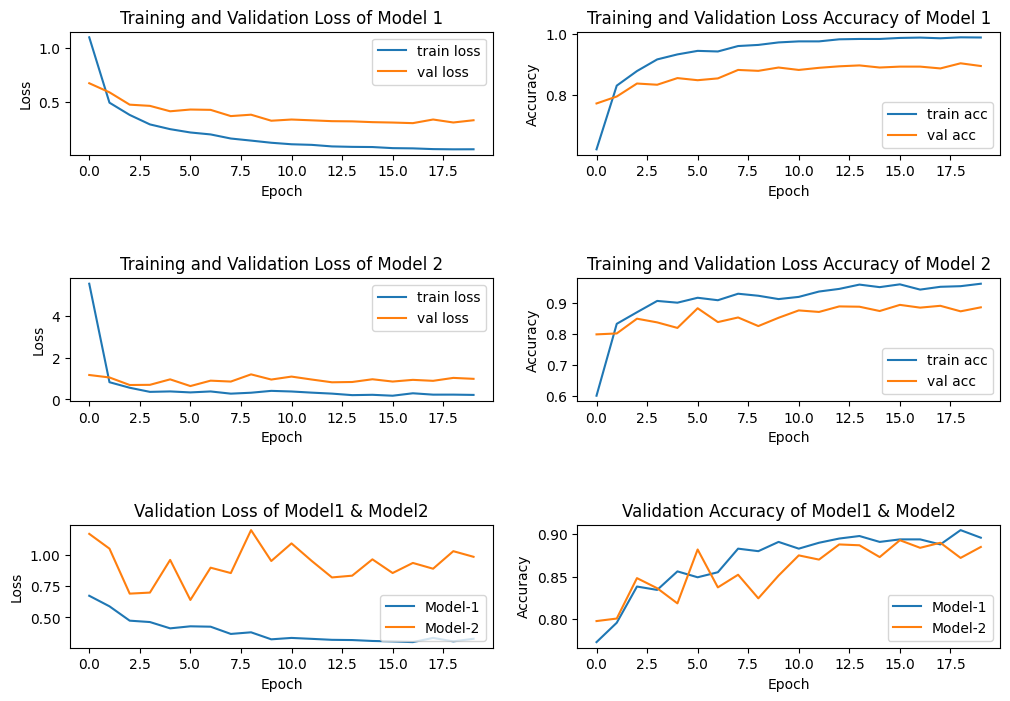

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=1 )

plt.subplot(3, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('M1LossVal_loss')
plt.legend()
plt.title('Training and Validation Loss of Model 1')


plt.subplot(3, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('M1AccVal_acc')
plt.legend()
plt.title('Training and Validation Loss Accuracy of Model 1')


plt.subplot(3, 2, 3)
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('M2LossVal_loss')
plt.legend()
plt.title('Training and Validation Loss of Model 2')


plt.subplot(3, 2, 4)
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('M2AccVal_acc')
plt.legend()
plt.title('Training and Validation Loss Accuracy of Model 2')

plt.subplot(3, 2, 5)
plt.plot(history.history['val_loss'], label='Model-1')
plt.plot(history2.history['val_loss'], label='Model-2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('M1M2_loss')
plt.legend()
plt.title('Validation Loss of Model1 & Model2')

plt.subplot(3, 2, 6)
plt.plot(history.history['val_accuracy'], label='Model-1')
plt.plot(history2.history['val_accuracy'], label='Model-2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('M1M2_acc')
plt.legend()
plt.title('Validation Accuracy of Model1 & Model2')

plt.show()






# Testing both the models

In [ ]:
deployed_model1 = keras.models.load_model('/content/drive/MyDrive/FlowerClassificationV2_VGG16.h5')
deployed_model2 = keras.models.load_model('/content/drive/MyDrive/FlowerClassificationV3_VGG16.h5')

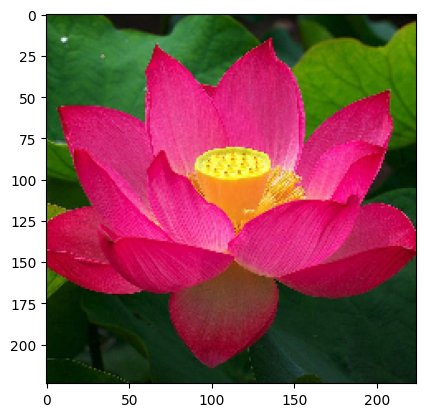

In [ ]:
img_path = "/content/drive/MyDrive/flower_images/Lotus/093ed8029f.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
plt.imshow(img)


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

prediction1 = deployed_model1.predict(x)
prediction2 = deployed_model2.predict(x)

print("\n\n" , prediction1)
print("\n\n" , prediction2)

Labels = ["Lilly" , "Lotus" , "Orchid" ,"Sunflower" , "Tulip"]

max1 = np.argmax(prediction1)
max2 = np.argmax(prediction2)

1/1 [==============================] - 0s 133ms/step


 [[4.898764e-35 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


 [[4.898764e-35 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


In [ ]:
print("\n-----------------------")
print("\nModel 1 Pridected : ", Labels[max1])
print("\n-----------------------")
print("\nModel 2 Pridected : ", Labels[max2])



-----------------------

Model 1 Pridected :  Lotus

-----------------------

Model 2 Pridected :  Lotus
